In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fraud = pd.read_csv("Fraud_check (1).csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


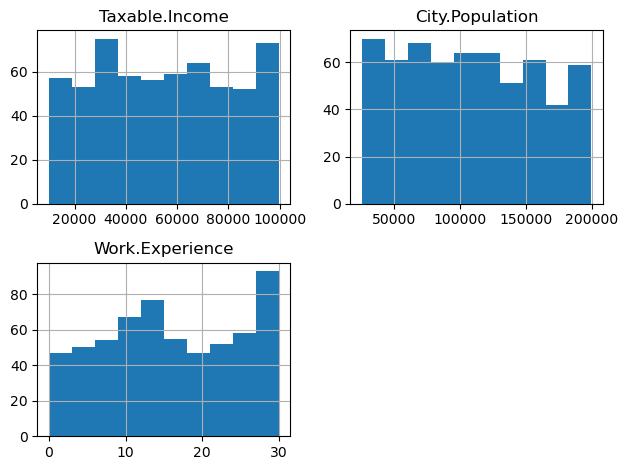

In [6]:
fraud.hist()
plt.tight_layout()

<Axes: >

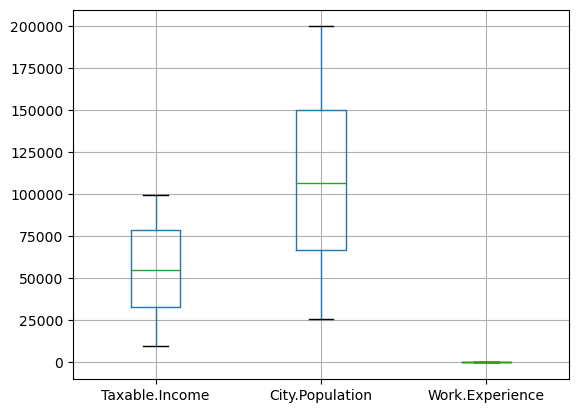

In [7]:
fraud.boxplot()

In [ ]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [ ]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [ ]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

In [ ]:
model.estimators_
model.classes_
model.n_features_in_
model.n_classes_

In [ ]:
model.n_outputs_

In [ ]:
model.oob_score_

In [ ]:
prediction = model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [ ]:
np.mean(prediction == y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
acc_test =accuracy_score(y_test,pred_test)

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from sklearn.externals.six import StringIO

In [ ]:
tree = model.estimators_[5]

In [ ]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [ ]:
pip install pydotplus

In [ ]:
import pydotplus
from IPython.display import Image

# Assuming 'dot_data' is your Dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as an image
graph.write_png('output.png')

# Display the image
Image(filename='output.png')
